# Medical Imaging Course

**Instructor**: [Mg. Facundo M. Calcagno](mailto:fmcalcagno@gmail.com)

---

## Course Overview

Medical imaging is a vital component in modern medicine, playing a critical role in both diagnostics and treatment. This course will delve into the fundamental principles and techniques used in various medical imaging modalities.

### Objectives:
1. Understand the basic principles behind medical imaging techniques.
2. Learn the clinical applications and implications of different imaging modalities.
3. Explore the recent advancements and the future of medical imaging.

### Modules:
1. **Introduction to Medical Imaging** - Overview of various imaging techniques.
2. **MRI (Magnetic Resonance Imaging)** - Basic understanding, technical aspects, and applications.
3. **Diffusor Tensor Imaging (DTI)** - Introduction to DTI.
4. **Advancements & Future Trends** - AI in medical imaging, and other innovations.

---

### Prerequisites:
Basic knowledge in anatomy, physiology, physics and CODE !

### Recommended Reading:
- "Fundamentals of Medical Imaging" by Paul Suetens.
- "Introduction to the Science of Medical Imaging" by R. Nick Bryan.

---

**Note**: For any further queries or clarifications, feel free to [email the instructor](mailto:fmcalcagno@gmail.com) 


## Course 0: What are we going to do in this course

### Different modalities in medical Images 

## X-Rays

X-rays are a form of electromagnetic radiation, similar to visible light. Unlike light, however, x-rays have higher energy and can pass through most objects, including the body. Medical x-rays are used to generate images of tissues and structures inside the body. If x-rays traveling through the body also pass through an x-ray detector on the other side of the patient, an image will be formed that represents the “shadows” formed by the objects inside of the body.

![image](https://www.nibib.nih.gov/sites/default/files/inline-images/X-ray-broken-arm-400x534_0.jpg)

## MRI

Magnetic resonance imaging (MRI) is a medical imaging technique that uses a magnetic field and computer-generated radio waves to create detailed images of the organs and tissues in your body.

MRI is a noninvasive way for a medical professional to examine your organs, tissues and skeletal system. It produces high-resolution images of the inside of the body that help diagnose a variety of conditions.


### PET SCAN

A positron emission tomography (PET) scan is an imaging test that can help reveal the metabolic or biochemical function of your tissues and organs.

### Computerized Tomography (CT)
A computerized tomography (CT) scan combines a series of X-ray images taken from different angles around your body and uses computer processing to create cross-sectional images (slices) of the bones, blood vessels and soft tissues inside your body. CT scan images provide more-detailed information than plain X-rays do.


![Image](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2017/05/15/20/19/mcdc7_pet_combined-8col.jpg)

### T1-Weighted Imaging (T1w)
Contrast: Emphasizes differences in the longitudinal relaxation times.
Appearance:
Fat appears bright (high signal).
Water and cerebrospinal fluid (CSF) appear dark (low signal).
Common Uses:
Anatomy detailing.
Identification of fatty tissue.
Post-contrast imaging (after gadolinium administration).

### T2-Weighted Imaging (T2)
Contrast: Emphasizes differences in the transverse relaxation times.
Appearance:
Fat appears moderately bright.
Water and CSF appear very bright.
Common Uses:
Detecting pathologies such as tumors, inflammation, or edema.
Visualizing organs and structures filled with fluid.

![image](https://www.researchgate.net/publication/51114233/figure/fig1/AS:214196957519872@1428079942298/a-T1W-flair-and-b-T2W-brain-magnetic-resonance-imaging-MRI-shows-communicating.png)

### Fluid-Attenuated Inversion Recovery (FLAIR)
Contrast: A specialized T2-weighted image where free fluid appears dark.
Appearance:
CSF appears dark (suppressed).
Lesions or abnormalities that contain fluid (other than CSF) appear bright.
Common Uses:
Detecting brain lesions, such as multiple sclerosis plaques.
Highlighting periventricular lesions which might be obscured by bright CSF on T2 images.

### Diffusion Tensor Imaging (DTI)
Contrast: Maps the diffusion of water molecules in tissues.
Appearance: Produces multiple images and derived maps (e.g., fractional anisotropy, mean diffusivity).
Common Uses:
Mapping white matter tracts in the brain (tractography).
Identifying microstructural changes in conditions like stroke, trauma, or neurodegenerative diseases.

![Image](https://www.umimri.com/wp-content/uploads/DTI-3D-Fiber-Track-Full-Brain.jpg)

### Where to obtain open Source MRI Images

### 1. Human Connectome 
[Link](https://db.humanconnectome.org/app/template/Login.vm)



### 2. brainlife.io
[Link](https://brainlife.io/datasets)

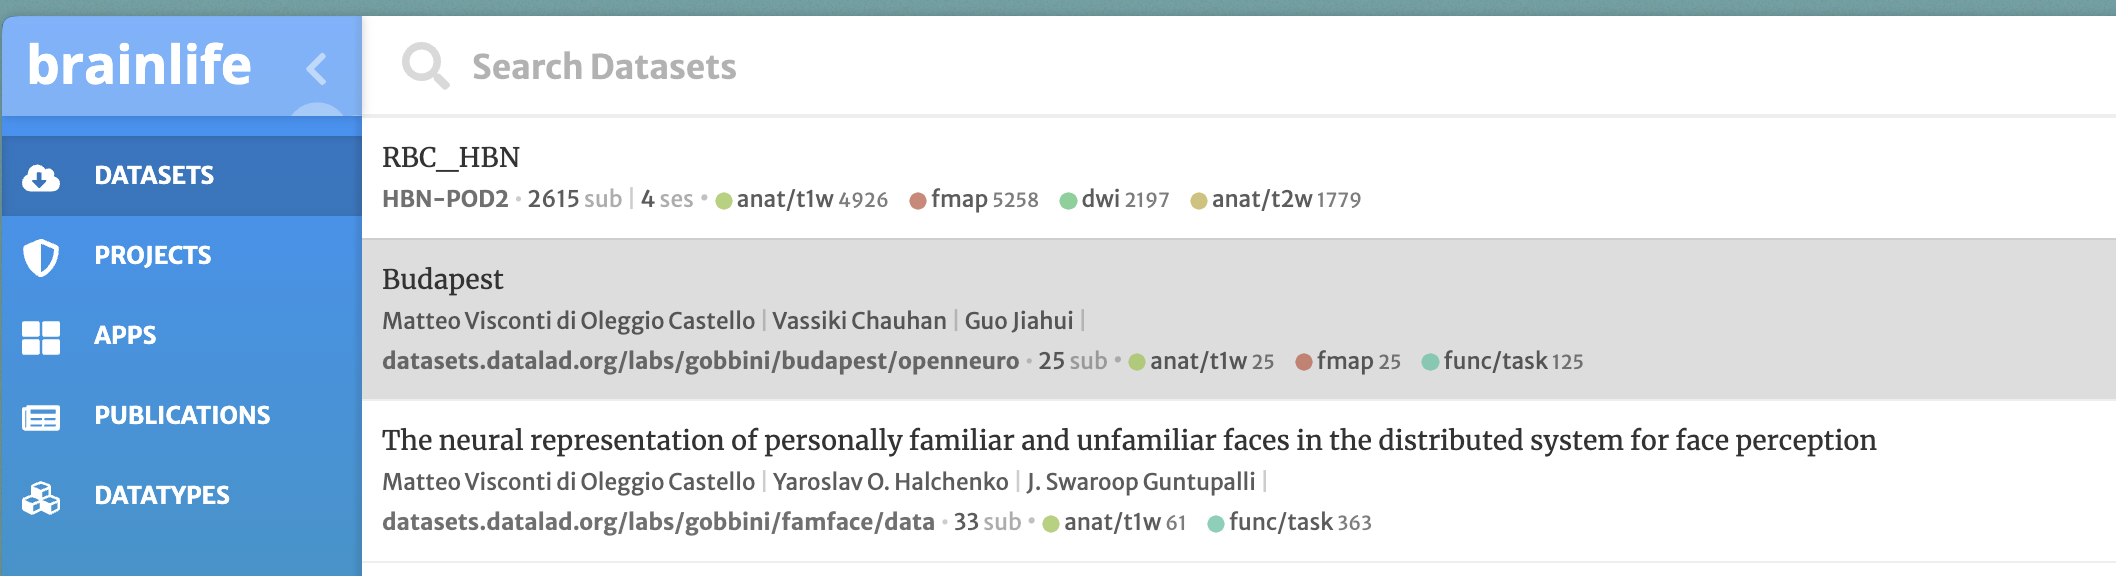

### Open a nifti file and analyze the contents

In [1]:
#Install necesary Libraries
!pip install --quiet nibabel matplotlib ipywidgets pydicom

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import ipywidgets as widgets
from ipywidgets import interactive_output, HBox, VBox
from IPython.display import display
import numpy as np
import os

file_name = '/home/jovyan/image_notebooks/images/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz'
# Download the NIFTI image
url = 'https://openneuro.org/crn/datasets/ds000117/snapshots/1.0.5/files/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz'  
response = requests.get(url)

with open(file_name, 'wb') as f:
    f.write(response.content)
    
img1 = nib.load(file_name)

# Get the image data as a numpy array
data1 = img1.get_fdata()

def plot_slice(x=0, y=0, z=0):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(data1[x, ::-1, :], cmap='gray')
    ax[0].set_title('Slice along Coronal plane')
    ax[0].axis('off')
    
    ax[1].imshow(data1[:, y, :], cmap='gray')
    ax[1].set_title('Slice along Axial plane')
    ax[1].axis('off')
    
    ax[2].imshow(np.rot90(data1[:, :, z], 1), cmap='gray')
    ax[2].set_title('Slice along Sagital plane')
    ax[2].axis('off')
    
    plt.show()

# Create interactive widgets
x_slider1 = widgets.IntSlider(min=0, max=data1.shape[0]-1, step=1, value=data1.shape[0]//2, description='Coronal')
y_slider1 = widgets.IntSlider(min=0, max=data1.shape[1]-1, step=1, value=data1.shape[1]//2, description='Axial')
z_slider1 = widgets.IntSlider(min=0, max=data1.shape[2]-1, step=1, value=data1.shape[2]//2, description='Sagital')

# Create the interactive output with our function and the sliders
out1 = interactive_output(plot_slice, {'x': x_slider1, 'y': y_slider1, 'z': z_slider1})

# Display the output with the sliders below the image
display(VBox([out1, HBox([x_slider1, y_slider1, z_slider1])]))

In [4]:
from IPython.display import display, HTML
header = img1.header

html_table = "<table border='1'>"
html_table += "<tr><th colspan='2'>Nifti Header Information</th></tr>"

for key, value in header.items():
    html_table += f"<tr><td><b>{key}</b></td><td>{value[()]}<td></tr>"
html_table += "</table>"
display(HTML(html_table))

#### 
Image Dimensions

![Nifti](https://carpentries-incubator.github.io/SDC-BIDS-IntroMRI/fig/mri_slices.jpg)

### Open a DICOM image and analize the contents

In [8]:
import pydicom
import warnings 
warnings. filterwarnings('ignore')
dcm_img = pydicom.dcmread("/home/jovyan/image_notebooks/images/PPMI_115680_MR_T1-weighted,_3D_VOLUMETRIC_br_raw_20221123163948120_153_S1178279_I1645096.dcm", force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.5267232910591499029
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.8068405382915275606
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_362'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 1092
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.5267232

### Create a Brain Mask

We use an Open source library https://pypi.org/project/brainextractor/

In [9]:
!pip install --quiet brainextractor

In [11]:
!brainextractor '/home/jovyan/image_notebooks/images/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz' '/home/jovyan/image_notebooks/images/brain_mask.nii.gz'

Initializing...
Parameters: bt=0.500000, d1=20.000000, d2=10.000000, rmin=3.330000, rmax=10.000000
tmin: 0.000000, t2: 0.000000, t: 37.200000, t98: 372.000000, tmax: 1060.000000
Center-of-Mass: [155.96503942  92.59984868  95.30603012]
Head Radius: 94.558543
Median within Head Radius: 213.000000
Initializing surface...
Brain extractor initialization complete!
Running surface deformation...
Iteration: 999
Complete.
Saving mask...
Mask saved.


In [12]:
import nibabel as nib
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import ipywidgets as widgets
from ipywidgets import interactive_output, HBox, VBox
from IPython.display import display
import numpy as np
import os

file_name = '/home/jovyan/image_notebooks/images/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz'
img = nib.load(file_name)
data2 = img.get_fdata()
mask_file_name = '/home/jovyan/image_notebooks/images/brain_mask.nii.gz'
mask_img = nib.load(mask_file_name)
mask_data2 = mask_img.get_fdata()

show_image = True
show_mask = True

def toggle_brain_image(change):
    global show_image
    show_image = change['new']
    plot_slice(x=x_slider2.value, y=y_slider2.value, z=z_slider2.value)

def toggle_brain_mask(change):
    global show_mask
    show_mask = change['new']
    plot_slice(x=x_slider2.value, y=y_slider2.value, z=z_slider2.value)

def plot_slice(x=0, y=0, z=0):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the brain image
    if show_image:
        ax[0].imshow(data2[x, ::-1, :], cmap='gray')
        ax[1].imshow(data2[:, y, :], cmap='gray')
        ax[2].imshow(np.rot90(data2[:, :, z], 1), cmap='gray')
    
    # Overlay the mask
    if show_mask:
        ax[0].imshow(mask_data2[x, ::-1, :], cmap='jet', alpha=0.5)
        ax[1].imshow(mask_data2[:, y, :], cmap='jet', alpha=0.5)
        ax[2].imshow(np.rot90(mask_data2[:, :, z], 1), cmap='jet', alpha=0.5)
    
    ax[0].set_title('Slice along Coronal plane')
    ax[0].axis('off')
    ax[1].set_title('Slice along Axial plane')
    ax[1].axis('off')
    ax[2].set_title('Slice along Sagital plane')
    ax[2].axis('off')
    
    plt.show()

brain_toggle2 = widgets.ToggleButton(value=True, description='Show Brain Image')
mask_toggle2 = widgets.ToggleButton(value=True, description='Show Brain Mask')
brain_toggle2.observe(toggle_brain_image, 'value')
mask_toggle2.observe(toggle_brain_mask, 'value')

x_slider2 = widgets.IntSlider(min=0, max=data2.shape[0]-1, step=1, value=data2.shape[0]//2, description='Coronal')
y_slider2 = widgets.IntSlider(min=0, max=data2.shape[1]-1, step=1, value=data2.shape[1]//2, description='Axial')
z_slider2 = widgets.IntSlider(min=0, max=data2.shape[2]-1, step=1, value=data2.shape[2]//2, description='Sagital')

# Create the interactive output with our function and the sliders
out2 = interactive_output(plot_slice, {'x': x_slider2, 'y': y_slider2, 'z': z_slider2})

# Display the output with the sliders and buttons below the image
display(VBox([out2, HBox([x_slider2, y_slider2, z_slider2]), HBox([brain_toggle2, mask_toggle2])]))


### Create a Brain Segmentation Mask Using FastSurfer

In [13]:
#@title Here we first setup the environment by downloading the open source deep-mi/fastsurfer project and the required packages
import os
import sys
from os.path import exists, join, basename, splitext

print("Starting setup. This could take a few minutes")
print("----------------------------------------------")

SETUP_DIR = os.environ["HOME"] + "/fastsurfer_tutorial/"

# Go to the FastSurfer directory
!mkdir -p "{SETUP_DIR}"
%cd "{SETUP_DIR}"

print(f"Using {SETUP_DIR} to store files.")

print("Downloading FastSurfer")
print("----------------------------------------------")

git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
FASTSURFER_HOME = SETUP_DIR + project_name + "/"
if not exists(project_name):
  # clone and install dependencies
  ! git clone -q --branch stable $git_repo_url
  ! pip install -r $FASTSURFER_HOME/requirements.txt
sys.path.append(FASTSURFER_HOME)

# Update dependencies
print("Installing required packages")
print("----------------------------------------------")

! pip install torchio
! pip install yacs==0.1.8
! pip install plotly==5.9.0
! pip install torchvision
print("Finished setup")
print("----------------------------------------------")


Starting setup. This could take a few minutes
----------------------------------------------
/home/jovyan/fastsurfer_tutorial
Using /home/jovyan/fastsurfer_tutorial/ to store files.
----------------------------------------------
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.8/167.8 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 27.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.4/392.4 kB 35.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bu

In [14]:
img = '/home/jovyan/image_notebooks/images/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz'

In [17]:
#@title The first part of FastSurfer creates a whole-brain segmentation into 95 classes. Here, we use the pretrained deep-learning network FastSurferCNN using the checkpoints stored at the open source project deep-mi/fastsurfer to to run the model inference on a single image.
! FASTSURFER_HOME=$FASTSURFER_HOME \
  $FASTSURFER_HOME/run_fastsurfer.sh --t1 $img \
                                     --sd "{SETUP_DIR}fastsurfer_seg" \
                                     --sid Tutorial \
                                     --seg_only --py python3 \
                                     --allow_root

Wed Sep 27 09:04:22 AM UTC 2023

python3 /home/jovyan/fastsurfer_tutorial/fastsurfer//FastSurferCNN/run_prediction.py --t1 /home/jovyan/image_notebooks/images/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz --asegdkt_segfile /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz --conformed_name /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/orig.mgz --brainmask_name /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/mask.mgz --aseg_name /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/aseg.auto_noCCseg.mgz --sid Tutorial --seg_log /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/scripts/deep-seg.log --vox_size min --batch_size 1 --viewagg_device auto --device auto --allow_root
[INFO: run_prediction.py:  392]: Checking or downloading default checkpoints ...
[INFO: common.py:  102]: Using device: cpu
[INFO: run_prediction.py:  133]: Running view aggregation on cpu
[INFO: inference.py:  110]: Loading 

In [19]:
#@title Click the run buttion to plot some slices from the segmented brain
%matplotlib inline
import nibabel as nib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from skimage import color
import torch
import numpy as np
from torchvision import utils

def plot_predictions(image, pred):
    """
    Function to plot predictions from validation set.
    :param images_batch:
    :param labels_batch:
    :param batch_output:
    :param plt_title:
    :param file_save_name:
    :return:
    """

    f = plt.figure(figsize=(20, 20))
    n, h, w = image.shape

    mid_slice = n // 2
    image = torch.from_numpy(np.expand_dims(image[mid_slice+16:mid_slice+32, :, :], 1))
    grid = utils.make_grid(image, nrow=4)
    grid2 = utils.make_grid(torch.from_numpy(np.expand_dims(pred[mid_slice+16:mid_slice+32, ...], 1)), nrow=4)[0]
    color_grid = color.label2rgb(grid2.numpy(), bg_label=0)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.imshow(color_grid, alpha=0.3)
    plt.title('Overlay_GT')

    for ax in f.axes:
      ax.grid(visible=None)
      ax.axis("off")
    plt.tight_layout()

    plt.show()

orig_data = nib.load('/home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/orig.mgz').get_fdata() / 255
pred_data = nib.load('/home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz').get_fdata()
plot_predictions(orig_data, pred_data)

In [21]:
import nibabel as nib
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import ipywidgets as widgets
from ipywidgets import interactive_output, HBox, VBox
from IPython.display import display
import numpy as np
import os

file_name = '/home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/orig.mgz' 
img3 = nib.load(file_name)
data3 = img3.get_fdata()

mask_file_name = '/home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/cerebellum.CerebNet.nii.gz'
mask_img = nib.load(mask_file_name)
mask_data3 = mask_img.get_fdata()

show_image = True
show_mask = True

def toggle_brain_image(change):
    global show_image
    show_image = change['new']
    plot_slice(x=x_slider3.value, y=y_slider3.value, z=z_slider3.value)

def toggle_brain_mask(change):
    global show_mask
    show_mask = change['new']
    plot_slice(x=x_slider3.value, y=y_slider3.value, z=z_slider3.value)

def plot_slice(x=0, y=0, z=0):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the brain image
    if show_image:
        ax[0].imshow(data3[x, :, :], cmap='gray')
        ax[1].imshow(data3[:, y, :], cmap='gray')
        ax[2].imshow(np.rot90(data3[:, :, z], 3), cmap='gray')
    
    # Overlay the mask
    if show_mask:
        ax[0].imshow(mask_data3[x, :, :], cmap='jet', alpha=0.3)
        ax[1].imshow(mask_data3[:, y, :], cmap='jet', alpha=0.3)
        ax[2].imshow(np.rot90(mask_data3[:, :, z], 3), cmap='jet', alpha=0.3)
    
    ax[0].set_title('Slice along Coronal plane')
    ax[0].axis('off')
    ax[1].set_title('Slice along Axial plane')
    ax[1].axis('off')
    ax[2].set_title('Slice along Sagital plane')
    ax[2].axis('off')
    
    plt.show()

brain_toggle3 = widgets.ToggleButton(value=True, description='Show Brain Image')
mask_toggle3 = widgets.ToggleButton(value=True, description='Show Brain Mask')
brain_toggle3.observe(toggle_brain_image, 'value')
mask_toggle3.observe(toggle_brain_mask, 'value')

x_slider3 = widgets.IntSlider(min=0, max=data3.shape[0]-1, step=1, value=data3.shape[0]//2, description='Coronal Slice:')
y_slider3 = widgets.IntSlider(min=0, max=data3.shape[1]-1, step=1, value=data3.shape[1]//2, description='Axial Slice:')
z_slider3 = widgets.IntSlider(min=0, max=data3.shape[2]-1, step=1, value=data3.shape[2]//2, description='Sagital Slice:')

# Create the interactive output with our function and the sliders
out3 = interactive_output(plot_slice, {'x': x_slider3, 'y': y_slider3, 'z': z_slider3})

# Display the output with the sliders and buttons below the image
display(VBox([out3, HBox([x_slider3, y_slider3, z_slider3]), HBox([brain_toggle3, mask_toggle3])]))


### Metric from volumetric data: region volumes 

In [22]:
from IPython.display import display, Markdown

# Read the file
with open('/home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/stats/cerebellum.CerebNet.stats', 'r') as file:
    content = file.read()

# Display content with markdown formatting
display(Markdown(f"```plaintext\n{content}\n```"))

```plaintext
# Title Segmentation Statistics
#
# generating_program segstats.py
# cmdline /home/jovyan/fastsurfer_tutorial/fastsurfer//CerebNet/run_prediction.py --t1 /home/jovyan/image_notebooks/images/sub-01:ses-mri:anat:sub-01_ses-mri_acq-mprage_T1w.nii.gz --asegdkt_segfile /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz --conformed_name /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/orig.mgz --cereb_segfile /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/cerebellum.CerebNet.nii.gz --seg_log /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/scripts/deep-seg.log --batch_size 1 --viewagg_device auto --device auto --async_io --threads 1 --norm_name /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/orig_nu.mgz --cereb_statsfile /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/stats/cerebellum.CerebNet.stats --allow_root
# sysname  Linux
# hostname 20961f2be987
# machine  aarch64
# user       jovyan
# anatomy_type volume
#
# SegVolFile /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/cerebellum.CerebNet.nii.gz
# SegVolFileTimestamp 2023/09/27 09:28:33
# ColorTable /home/jovyan/fastsurfer_tutorial/fastsurfer/FastSurferCNN/config/FreeSurferColorLUT.txt
# ColorTableTimestamp 2023/09/27 08:26:07
# PVVolFile /home/jovyan/fastsurfer_tutorial/fastsurfer_seg/Tutorial/mri/orig_nu.mgz
# PVVolFileTimestamp 2023/09/27 09:26:15
#
# Only reporting non-empty segmentations
# VoxelVolume_mm3 1.0
# TableCol  1 ColHeader Index
# TableCol  1 FieldName Index
# TableCol  1 Units     NA
# TableCol  2 ColHeader SegId
# TableCol  2 FieldName Segmentation Id
# TableCol  2 Units     NA
# TableCol  3 ColHeader NVoxels
# TableCol  3 FieldName Number of Voxels
# TableCol  3 Units     NA
# TableCol  4 ColHeader Volume_mm3
# TableCol  4 FieldName Volume
# TableCol  4 Units     mm^3
# TableCol  5 ColHeader StructName
# TableCol  5 FieldName Structure Name
# TableCol  5 Units     NA
# TableCol  6 ColHeader normMean
# TableCol  6 FieldName Intensity normMean
# TableCol  6 Units     MR
# TableCol  7 ColHeader normStdDev
# TableCol  7 FieldName Intensity normStdDev
# TableCol  7 Units     MR
# TableCol  8 ColHeader normMin
# TableCol  8 FieldName Intensity normMin
# TableCol  8 Units     MR
# TableCol  9 ColHeader normMax
# TableCol  9 FieldName Intensity normMax
# TableCol  9 Units     MR
# TableCol  10 ColHeader normRange
# TableCol  10 FieldName Intensity normRange
# TableCol  10 Units     MR
# NRows 30
# NTableCols 10
# ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange
 1   7 13498 15044.639 Left-Cerebellum-White-Matter  104.7625  7.5937 67.0000 130.0000  63.0000
 2   8 56456 53563.494 Left-Cerebellum-Cortex         69.5860 14.8591  0.0000 116.0000 116.0000
 3  46 13644 15010.365 Right-Cerebellum-White-Matter 105.9692  7.2359 62.0000 131.0000  69.0000
 4  47 55547 52802.574 Right-Cerebellum-Cortex        71.9713 14.5979  0.0000 114.0000 114.0000
 5 601  3496  3280.437 Cbm_Left_I_IV                  75.2311 15.2076 15.0000 109.0000  94.0000
 6 602  3359  3115.055 Cbm_Right_I_IV                 77.6139 15.0021 12.0000 105.0000  93.0000
 7 603  4136  3925.357 Cbm_Left_V                     74.7517 12.8622 23.0000 111.0000  88.0000
 8 604  4016  3829.308 Cbm_Right_V                    76.9544 13.3012 21.0000 111.0000  90.0000
 9 605  8983  8754.860 Cbm_Left_VI                    73.0189 11.4552 14.0000 100.0000  86.0000
10 606  1768  1633.604 Cbm_Vermis_VI                  70.4881 17.9606 12.0000 103.0000  91.0000
11 607  8253  8016.683 Cbm_Right_VI                   76.1601 11.2847 21.0000 102.0000  81.0000
12 608 12808 12162.896 Cbm_Left_CrusI                 64.7650 15.6278  5.0000 108.0000 103.0000
13 610 13001 12435.186 Cbm_Right_CrusI                67.7783 15.1148  2.0000 109.0000 107.0000
14 611  7600  7051.200 Cbm_Left_CrusII                63.2436 15.5500  5.0000 102.0000  97.0000
15 613  8615  8048.183 Cbm_Right_CrusII               66.9522 15.2251  5.0000 103.0000  98.0000
16 614  5062  4761.323 Cbm_Left_VIIb                  65.2242 14.5988  0.0000  97.0000  97.0000
17 616  4392  4195.009 Cbm_Right_VIIb                 67.3773 14.7107  0.0000  98.0000  98.0000
18 617  6254  6098.692 Cbm_Left_VIIIa                 70.3153 15.7800  0.0000 109.0000 109.0000
19 619  6222  5986.061 Cbm_Right_VIIIa                72.1050 14.8364  0.0000 106.0000 106.0000
20 620  4471  4139.306 Cbm_Left_VIIIb                 76.2100 15.4139  7.0000 110.0000 103.0000
21 622  4096  3840.515 Cbm_Right_VIIIb                76.1982 15.5707 12.0000 107.0000  95.0000
22 623  2838  2667.617 Cbm_Left_IX                    79.4827 17.6078 17.0000 116.0000  99.0000
23 624   960   914.171 Cbm_Vermis_IX                  84.3615 16.1675 29.0000 121.0000  92.0000
24 625  2805  2644.401 Cbm_Right_IX                   81.5914 16.5614 17.0000 114.0000  97.0000
25 626   808   721.805 Cbm_Left_X                     66.8936 17.6480 19.0000 104.0000  85.0000
26 627   334   307.269 Cbm_Vermis_X                   71.9790 21.7000 18.0000 106.0000  88.0000
27 628   788   692.173 Cbm_Right_X                    71.0406 18.5790 22.0000 106.0000  84.0000
28 630   616   542.439 Cbm_Vermis_VII                 69.4351 19.6118 19.0000 103.0000  84.0000
29 631  2407  2306.079 Cbm_Vermis_VIII                76.3548 18.5142 14.0000 116.0000 102.0000
30 632  6085  5703.562 Cbm_Vermis                     74.9727 18.3057 12.0000 121.0000 109.0000

```

### Open Source Visualisation Tool

OHIF

https://viewer.ohif.org/viewer?StudyInstanceUIDs=1.3.12.2.1107.5.2.32.35162.30000015050317233592200000046

### Tractography using Deep Learning



https://github.com/MIC-DKFZ/TractSeg/tree/master#how-to-use

![Results](https://github.com/MIC-DKFZ/TractSeg/blob/master/resources/Tractometry_results_example_3D.png?raw=true)
![Results](https://github.com/MIC-DKFZ/TractSeg/blob/master/resources/trackings.png?raw=true)

### Relation between Patient volumetric data and other biomarkers 

![Image](https://github.com/MIC-DKFZ/TractSeg/blob/master/resources/Tractometry_results_example.png?raw=true)

### Challenge: Open Brain Tumor Segmentation Challenge

![Image](https://raw.githubusercontent.com/Project-MONAI/tutorials/0b2638bd1cb9440ea94ae34571be0516a7460775/figures/brats_tasks.png)